# 1)WEB SCRAPING

In [110]:
## Import necessary libraries for these
import requests 
from bs4 import BeautifulSoup as bs
import re 
import pandas as pd
import numpy as np
import time
import random

internship_role = []
company_name = []
hiring_type = []
location = []
stipend = [] 
duration = [] 
job_offer = []
posted_time = []
early_applicant = []
links = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
(KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

for page in range(1, 152):  # 1 to 151
    url = f"https://internshala.com/internships/83/83/83/page-{page}/"
    print(f"Scraping Page {page} → {url}")
    
    # give a requests for website
    response = requests.get(url,headers)
    
    ## to get a html code style 
    soup = bs(response.text,'html.parser')
    
    
    ## 1) Extract Internship role
    
    container = soup.find_all('div', class_ ="internship_meta duration_meta") # container 
    
    for i in container:
        text = i.find('a',class_ = 'job-title-href').text
        if text:
            internship_role.append(text)
        else:
            internship_role.append(np.nan)
    # print(internship_role)
    # print('-'*128)
    # print("Lenght of Internship Role :",len(internship_role))
    
    ## 2)Extract company name 
    
    for i in container:
        text = i.find('p',class_ = 'company-name').text.strip()
        if text :
            company_name.append(text)
        else:
            company_name.append(np.nan)
    # print(company_name)
    # print('-'*128)
    # print("Lenght of Company Name :",len(company_name))
    
    # 3)Extract the Hiring Type
    
    for i in container:
        badge = i.find('div', class_='actively-hiring-badge')
        if badge:
            hiring_type.append(badge.text.strip())
        else:
            hiring_type.append(np.nan)
    
    # print(hiring_type)
    # print('-'*128)
    # print("Lenght of Hiring Type:",len(hiring_type))
    
    ## 4)Extract the location
    for i in container:
        text = i.find('span').text.replace(' ','').strip().replace('(Hybrid)','')
        if text:
            location.append(text)
        else:
            location.append(np.nan)
    # print(location)
    # print('-'*128)
    # print("Lenght of Location :",len(location))
    
    # 5)Extract the stipend
    
    for i in container:
        stipend_span = i.find('span', class_='stipend')
        
        if stipend_span is None:
            stipend.append(np.nan)
            continue  # skip to next item
    
        text1 = stipend_span.text.strip().lower()
    
        if 'unpaid' in text1:
            stipend.append(np.nan)
            continue
    
        clean = text1.replace(",", "")
        match = re.search(r'₹\s*(\d+)\s*-\s*(\d+)', clean)
    
        if match:
            max_value = int(match.group(2))  # get max
            stipend.append(max_value)
        else:
            single = re.search(r'₹\s*(\d+)', clean)
            stipend.append(int(single.group(1)) if single else np.nan)

    
    # print(stipend)
    # print('-' * 128)
    # print("Length of Stipend:", len(stipend))

    
    # 6)Extract the Duration
    
    item = soup.find_all('div',class_ = 'row-1-item')
    for i in range(2,len(item),3):
        text1 = item[i].find('span').text.strip()
        text = re.findall(r'(\d{1,2})\sMonths',text1)
        if text:
            duration.append(text[0])
        else:
            duration.append(np.nan)
    # print(duration)
    # print('-'*128)
    # print("Lenght of Duration :",len(duration))
    
    # 7)Extract the Job Offer
    
    for i in container:
        x = i.find_all('div', class_='ppo_status')
    
        if x :
            for i in x:
                y = i.find('span').text
                z = re.search(r'₹\s(\d.\d)|₹\s(\d)',y)
                if z:
                    job_offer.append(z.group())
                else:
                    job_offer.append(np.nan)
        else:
            job_offer.append(np.nan)
    # print(job_offer)
    # print('-'*128)
    # print("Lenght of Job Offer :",len(job_offer))
    
    ## 8)Extract the Posted Time
    
    for i in soup.find_all('div', class_ = 'color-labels'):
        text = i.find('span').text
        if text:
            posted_time.append(text)
        else:
            posted_time.append(np.nan)
            
    # print(posted_time)
    # print('-'*128)
    # print("Lenght of Posted Time:",len(posted_time))
    
    # 9)Extract the Early Applicant 
    
    for i in soup.find_all('div', class_='detail-row-2'):
        text = i.find('div', class_='early_applicant_wrapper')
        if text:
            x = text.find('span')
            if x:
                early_applicant.append(x.text.strip())
            else:
                early_applicant.append(np.nan)
        else:
            early_applicant.append(np.nan)
    
    # print(early_applicant)
    # 10)Extract the Apply Links
    for i in container:
        x = i.find('a')
        url = x.get('href')
        a = f'https://internshala.com{url}'
        links.append(a)
    # print(links)
    
    # Sleep for a random time between 2 and 50 seconds
    sleep_time = random.randint(2, 12)
    print(f"Sleeping for {sleep_time} seconds...")
    time.sleep(sleep_time)
    
# converting to dictionary
data = {
    'intern_role':internship_role,
    'company_name':company_name,
    'hiring_type':hiring_type,
    'location':location,
    'job_offer(LPA)':job_offer,
    'stipend_per_month':stipend,
    'duration(months)':duration,
    'posted_time':posted_time,
    'early_applicant':early_applicant,
    'apply_links':links
}

#converting to dataframe
df = pd.DataFrame(data)

Scraping Page 1 → https://internshala.com/internships/83/83/83/page-1/
Sleeping for 2 seconds...
Scraping Page 2 → https://internshala.com/internships/83/83/83/page-2/
Sleeping for 7 seconds...
Scraping Page 3 → https://internshala.com/internships/83/83/83/page-3/
Sleeping for 4 seconds...
Scraping Page 4 → https://internshala.com/internships/83/83/83/page-4/
Sleeping for 6 seconds...
Scraping Page 5 → https://internshala.com/internships/83/83/83/page-5/
Sleeping for 6 seconds...
Scraping Page 6 → https://internshala.com/internships/83/83/83/page-6/
Sleeping for 8 seconds...
Scraping Page 7 → https://internshala.com/internships/83/83/83/page-7/
Sleeping for 11 seconds...
Scraping Page 8 → https://internshala.com/internships/83/83/83/page-8/
Sleeping for 3 seconds...
Scraping Page 9 → https://internshala.com/internships/83/83/83/page-9/
Sleeping for 11 seconds...
Scraping Page 10 → https://internshala.com/internships/83/83/83/page-10/
Sleeping for 10 seconds...
Scraping Page 11 → https:

In [114]:
df.to_csv('scraped_data.csv',index = False) 

In [116]:
df

,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),posted_time,early_applicant,apply_links
0,Video Content Creator,Naiplus Solution Private Limited,Actively hiring,Ahmedabad,NaN,5000.0,6,3 weeks ago,NaN,https://internshala.com/internship/detail/part...
1,Business Development (Sales),UCTC - Universal Classic Tshirts Company,Actively hiring,Pune,NaN,15000.0,6,3 weeks ago,NaN,https://internshala.com/internship/detail/busi...
2,Search Engine Optimization (SEO),Search Digitally,Actively hiring,Mumbai,NaN,6000.0,6,1 week ago,NaN,https://internshala.com/internship/detail/sear...
3,AI Researcher (Non Tech),ABEX Excellence Private Limited,Actively hiring,Chennai,NaN,10000.0,3,3 days ago,NaN,https://internshala.com/internship/detail/ai-r...
4,Field Sales,Orderseva,Actively hiring,"Lucknow,Bhopal,Jaipur,Delhi",NaN,18000.0,4,1 week ago,NaN,https://internshala.com/internship/detail/fiel...
...,...,...,...,...,...,...,...,...,...,...
6045,Angular.js Development,Xportify Technologies Private Limited,NaN,Mumbai,NaN,15000.0,6,3 weeks ago,NaN,https://internshala.com/internship/detail/angu...
6046,Video Editing/Making,Asianxt Digital Technologies Private Limited,NaN,Bangalore,NaN,12000.0,3,3 weeks ago,NaN,https://internshala.com/internship/detail/vide...
6047,Content and Social Media Marketing,Decoris Beauty And Wellness LLP,NaN,Dehradun,NaN,20000.0,3,3 weeks ago,Be an early applicant,https://internshala.com/internship/detail/cont...
6048,Business Development (Sales),Ungeek,Actively hiring,"Mumbai,Nashik",NaN,8000.0,3,3 weeks ago,NaN,https://internshala.com/internship/detail/busi...


In [118]:
df['stipend_per_month'].isna().sum()

242

# 2)Data cleaning

In [1]:
import re 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('scraped_data.csv')
df.shape

(6050, 10)

In [3]:
df.columns

Index(['intern_role', 'company_name', 'hiring_type', 'location',
       'job_offer(LPA)', 'stipend_per_month', 'duration(months)',
       'posted_time', 'early_applicant', 'apply_links'],
      dtype='object')

## Understanding the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   intern_role        6050 non-null   object 
 1   company_name       6050 non-null   object 
 2   hiring_type        3196 non-null   object 
 3   location           6049 non-null   object 
 4   job_offer(LPA)     909 non-null    object 
 5   stipend_per_month  5808 non-null   float64
 6   duration(months)   5569 non-null   float64
 7   posted_time        6050 non-null   object 
 8   early_applicant    1329 non-null   object 
 9   apply_links        6050 non-null   object 
dtypes: float64(2), object(8)
memory usage: 472.8+ KB


In [10]:
df.describe(include='all')

,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),posted_time,early_applicant,apply_links
count,6050,6050,3196,6049,909,5808.000000,5569.000000,6050,1329,6050
unique,1613,4041,1,467,26,NaN,NaN,13,1,6024
top,Business Development (Sales),Pawzz,Actively hiring,Workfromhome,₹ 3,NaN,NaN,1 week ago,Be an early applicant,https://internshala.com/internship/detail/part...
freq,447,44,3196,2068,204,NaN,NaN,1261,1329,2
mean,NaN,NaN,NaN,NaN,NaN,13176.867252,4.203807,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,15637.016208,1.980947,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1000.000000,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,7000.000000,3.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,10000.000000,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,15000.000000,6.000000,NaN,NaN,NaN


In [12]:
df.columns

Index(['intern_role', 'company_name', 'hiring_type', 'location',
       'job_offer(LPA)', 'stipend_per_month', 'duration(months)',
       'posted_time', 'early_applicant', 'apply_links'],
      dtype='object')

### Changing the job_offer "object" datatype to "float"

In [15]:
df['job_offer(LPA)'] = (
    df['job_offer(LPA)']
    .astype(str)                        # Make sure it’s string
    .str.replace('₹', '', regex=False)  # Remove ₹ symbol
    .str.extract(r'([\d.]+)')           # Extract numeric part only
    .astype(float)                      # Convert to float
)


###  Checking the modify datatype for job_offer

In [18]:
df['job_offer(LPA)'].dtype

dtype('float64')

# To replace the 0 for nan values in job_offer

In [21]:
df['job_offer(LPA)'] = df['job_offer(LPA)'].fillna(0)

df['job_offer(LPA)'].value_counts()

# checking nan values 
df['job_offer(LPA)'].isna().sum()

0

### Checking the modify datatypes for Stipend_per_month

In [24]:
df['stipend_per_month'].dtype

dtype('float64')

In [26]:
df['stipend_per_month'] = df['stipend_per_month'].fillna(0)
df['stipend_per_month'].isna().sum()
df['stipend_per_month'] = df['stipend_per_month'].astype(int)

In [28]:
df['stipend_per_month'].dtype

dtype('int32')

# changing the early applicant to "yes" and for nan to "no"

In [31]:

df['early_applicant'] = df['early_applicant'].str.lower().str.strip()
df['early_applicant'] = df['early_applicant'].apply(
    lambda x: 'yes' if isinstance(x,str) and 'be an early applicant' in x else 'No'
)

## adding internship posted date

In [34]:
df['posted_time'].value_counts()

posted_time
1 week ago       1261
2 weeks ago      1247
3 weeks ago      1044
1 day ago         468
2 days ago        376
3 days ago        352
4 days ago        255
7 days ago        254
Few hours ago     206
5 days ago        176
6 days ago        151
Today             134
Just now          126
Name: count, dtype: int64

In [36]:
#getting days ago numbers only
df['posted_time'] = df['posted_time'].str.lower().str.strip()
df['posted_time'] = df['posted_time'].replace({
    'just now': '0',
    'today': '0',
    'few hours ago': '0',
    '1 day ago':'1',
    '2 days ago':'2',
    '3 days ago':'3',
    '4 days ago':'4',
    '5 days ago':'5',
    '6 days ago':'6',
    '7 days ago':'7',
    '1 week ago': '7',
    '2 weeks ago': '14',
    '3 weeks ago': '21'
})

In [38]:
df['posted_time'] = df['posted_time'].astype('int')

In [40]:
# adding date as per the data extracted from the date
from datetime import datetime, timedelta

# scraped the data on July 4, 2025
scraped_date = datetime.strptime("2025-07-04", "%Y-%m-%d")
scraped_date
df['posted_date'] = scraped_date - pd.to_timedelta(df['posted_time'], unit='D')

# Removing the duplicates

In [43]:
df[df.duplicated()]

,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),posted_time,early_applicant,apply_links,posted_date
52,AI Researcher (Non Tech),ABEX Excellence Private Limited,Actively hiring,Chennai,0.0,10000,3.0,3,No,https://internshala.com/internship/detail/ai-r...,2025-07-01
83,Marketing,Perceived Design,Actively hiring,Bangalore,3.0,12000,4.0,0,yes,https://internshala.com/internship/detail/mark...,2025-07-04
210,Telecalling(Female),Elevate X Solutions,Actively hiring,Bhubaneswar,0.0,8000,6.0,7,No,https://internshala.com/internship/detail/tele...,2025-06-27
217,CA Articleship,Manish Mittal And Company,Actively hiring,Noida,0.0,9000,24.0,7,yes,https://internshala.com/internship/detail/ca-a...,2025-06-27
521,Content Writing,Brightrays,Actively hiring,Noida,3.0,12000,3.0,0,No,https://internshala.com/internship/detail/cont...,2025-07-04
1330,Digital Marketing,Eduforn,NaN,Delhi,0.0,12000,6.0,2,No,https://internshala.com/internship/detail/digi...,2025-07-02
1331,Full Stack Development,Maxgen Technologies Private Limited,Actively hiring,Ahmedabad,0.0,12000,3.0,2,No,https://internshala.com/internship/detail/full...,2025-07-02
1332,Content and Social Media Marketing,Raj Eye Hospital,NaN,Gorakhpur,0.0,5000,NaN,2,yes,https://internshala.com/internship/detail/part...,2025-07-02
1333,Architecture,Eka Studio By Sana,NaN,Delhi,0.0,13000,3.0,2,yes,https://internshala.com/internship/detail/arch...,2025-07-02
1334,Media & Public Relations (PR),Sajan Shah,NaN,Ahmedabad,4.0,18000,5.0,2,No,https://internshala.com/internship/detail/part...,2025-07-02


In [45]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Replace and fill the "yes" for Actively Hiring and "no" for NAN values in Hiring_type

In [48]:
df['hiring_type'].value_counts()

hiring_type
Actively hiring    3178
Name: count, dtype: int64

In [50]:
df['hiring_type'] = df['hiring_type'].str.lower().str.strip()

df['hiring_type'] = df['hiring_type'].replace({'actively hiring':'yes'})

In [52]:
df['hiring_type'].value_counts()

hiring_type
yes    3178
Name: count, dtype: int64

In [54]:
df['hiring_type'].fillna('no',inplace=True)

C:\Users\Arul\AppData\Local\Temp\ipykernel_22112\723631046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hiring_type'].fillna('no',inplace=True)


In [56]:
df['hiring_type'].value_counts()

hiring_type
yes    3178
no     2846
Name: count, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6024 entries, 0 to 6049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   intern_role        6024 non-null   object        
 1   company_name       6024 non-null   object        
 2   hiring_type        6024 non-null   object        
 3   location           6023 non-null   object        
 4   job_offer(LPA)     6024 non-null   float64       
 5   stipend_per_month  6024 non-null   int32         
 6   duration(months)   5547 non-null   float64       
 7   posted_time        6024 non-null   int32         
 8   early_applicant    6024 non-null   object        
 9   apply_links        6024 non-null   object        
 10  posted_date        6024 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 517.7+ KB


# Checking NaN values count for each column

In [61]:
df.isna().sum()

intern_role            0
company_name           0
hiring_type            0
location               1
job_offer(LPA)         0
stipend_per_month      0
duration(months)     477
posted_time            0
early_applicant        0
apply_links            0
posted_date            0
dtype: int64

### To  replace the nan values to mode() for durantion(months) of each rows

In [64]:
df['duration(months)'].value_counts()

duration(months)
3.0     2275
6.0     2191
2.0      715
4.0      292
5.0       53
24.0      16
12.0       4
36.0       1
Name: count, dtype: int64

In [66]:
mode_duration = df['duration(months)'].mode()[0]
mode_duration = mode_duration.astype(int)
mode_duration


3

In [68]:
df['duration(months)'] = df['duration(months)'].fillna(mode_duration)

In [70]:
# checking nan values 
df['duration(months)'].isna().sum()

0

# fill 0 for nan values in stipend_min of  each rows 

In [73]:
print(np.sort(df['stipend_per_month'].unique()))

[     0   1000   1001   1100   1200   1400   1500   2000   2001   2002
   2020   2060   2100   2201   2500   2501   2599   3000   3001   3010
   3400   3500   3550   3700   3800   4000   4001   4100   4500   5000
   5001   5002   5003   5010   5020   5100   5101   5110   5120   5500
   5750   6000   6001   6300   6500   6501   6599   6600   7000   7001
   7499   7500   8000   8001   8002   8500   9000   9001   9500   9502
  10000  10001  10002  10003  10005  10100  10200  10500  10800  11000
  11001  11010  11500  12000  12001  12002  12500  13000  13001  13100
  13500  14000  14445  14500  15000  15001  15002  15150  15500  15900
  16000  16100  16500  16999  17000  17500  18000  18001  18500  19000
  20000  20001  20002  20500  20700  21000  21100  21500  22000  22500
  23000  24000  25000  25001  26000  27000  27500  28000  29000  30000
  30001  31000  32000  32001  32500  33000  34000  35000  36000  37000
  38000  39000  40000  41000  45000  48000  50000  50001  51000  52000
  5270

In [75]:
x = df['stipend_per_month']

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
df['stipend_per_month'] = df['stipend_per_month'].astype(int)
print(df['stipend_per_month'].dtype)

Lower bound: -7500.0
Upper bound: 28500.0
int32


In [77]:
print("Outliers below:")
df[df['stipend_per_month'] < lower_bound]

Outliers below:


,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),posted_time,early_applicant,apply_links,posted_date


In [79]:
print("Outliers above:")
df[df['stipend_per_month'] > upper_bound]

Outliers above:


,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),posted_time,early_applicant,apply_links,posted_date
33,Investment Analysis,B B Advisory,yes,Workfromhome,1.0,40000,2.0,0,yes,https://internshala.com/internship/detail/work...,2025-07-04
38,Business Analytics,ABEX Excellence Private Limited,yes,Chennai,4.5,60000,3.0,0,No,https://internshala.com/internship/detail/busi...,2025-07-04
64,Inside Sales,GenieHR Solutions Private Limited,yes,Mohali,0.0,50000,2.0,0,yes,https://internshala.com/internship/detail/insi...,2025-07-04
82,Telecalling,Delkon Technologies,yes,Bareilly,0.0,30000,6.0,0,yes,https://internshala.com/internship/detail/tele...,2025-07-04
128,Customer Service/Customer Support,Navir Consultants,yes,"Thane,NaviMumbai,Dombivli,Kalyan,Vashi,Panvel",0.0,30000,6.0,2,No,https://internshala.com/internship/detail/cust...,2025-07-02
...,...,...,...,...,...,...,...,...,...,...,...
5954,Compute Platform Engineer,Corteva Agriscience,yes,Workfromhome,0.0,35000,6.0,21,No,https://internshala.com/internship/detail/work...,2025-06-13
5969,Inside Sales,Yhills Edutech Private Limited,no,Bangalore,7.0,30000,3.0,21,No,https://internshala.com/internship/detail/insi...,2025-06-13
6008,Business Development (Sales),Strike Self Defense,yes,"Delhi,Noida",6.0,45000,2.0,21,No,https://internshala.com/internship/detail/part...,2025-06-13
6019,Sales,Talentika,yes,Bangalore,0.0,35000,6.0,21,No,https://internshala.com/internship/detail/sale...,2025-06-13


In [81]:
df.loc[df['stipend_per_month'] > upper_bound, 'stipend_per_month'] = np.nan

In [83]:
median_stipend = df['stipend_per_month'].median()
df['stipend_per_month'] = df['stipend_per_month'].fillna(median_stipend)
print(median_stipend)
print(df['stipend_per_month'].dtype)

10000.0
float64


In [85]:
print(np.sort(df['stipend_per_month'].unique()))

[    0.  1000.  1001.  1100.  1200.  1400.  1500.  2000.  2001.  2002.
  2020.  2060.  2100.  2201.  2500.  2501.  2599.  3000.  3001.  3010.
  3400.  3500.  3550.  3700.  3800.  4000.  4001.  4100.  4500.  5000.
  5001.  5002.  5003.  5010.  5020.  5100.  5101.  5110.  5120.  5500.
  5750.  6000.  6001.  6300.  6500.  6501.  6599.  6600.  7000.  7001.
  7499.  7500.  8000.  8001.  8002.  8500.  9000.  9001.  9500.  9502.
 10000. 10001. 10002. 10003. 10005. 10100. 10200. 10500. 10800. 11000.
 11001. 11010. 11500. 12000. 12001. 12002. 12500. 13000. 13001. 13100.
 13500. 14000. 14445. 14500. 15000. 15001. 15002. 15150. 15500. 15900.
 16000. 16100. 16500. 16999. 17000. 17500. 18000. 18001. 18500. 19000.
 20000. 20001. 20002. 20500. 20700. 21000. 21100. 21500. 22000. 22500.
 23000. 24000. 25000. 25001. 26000. 27000. 27500. 28000.]


In [87]:
df['stipend_per_month'] = df['stipend_per_month'].fillna(median_stipend)

In [89]:
df['stipend_per_month'].isna().sum()

0

In [91]:
print(np.sort(df['stipend_per_month'].unique()))

[    0.  1000.  1001.  1100.  1200.  1400.  1500.  2000.  2001.  2002.
  2020.  2060.  2100.  2201.  2500.  2501.  2599.  3000.  3001.  3010.
  3400.  3500.  3550.  3700.  3800.  4000.  4001.  4100.  4500.  5000.
  5001.  5002.  5003.  5010.  5020.  5100.  5101.  5110.  5120.  5500.
  5750.  6000.  6001.  6300.  6500.  6501.  6599.  6600.  7000.  7001.
  7499.  7500.  8000.  8001.  8002.  8500.  9000.  9001.  9500.  9502.
 10000. 10001. 10002. 10003. 10005. 10100. 10200. 10500. 10800. 11000.
 11001. 11010. 11500. 12000. 12001. 12002. 12500. 13000. 13001. 13100.
 13500. 14000. 14445. 14500. 15000. 15001. 15002. 15150. 15500. 15900.
 16000. 16100. 16500. 16999. 17000. 17500. 18000. 18001. 18500. 19000.
 20000. 20001. 20002. 20500. 20700. 21000. 21100. 21500. 22000. 22500.
 23000. 24000. 25000. 25001. 26000. 27000. 27500. 28000.]


In [93]:
df['stipend_per_month'] = df['stipend_per_month'].astype(int)

# drop unwanted columns

In [96]:
df.drop(columns=['apply_links'], inplace=True)

In [98]:
df.drop(columns=['posted_time'], inplace=True)

In [100]:
df.to_csv('cleaned_data.csv',index = False)
new_df = pd.read_csv('cleaned_data.csv')
new_df

,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),early_applicant,posted_date
0,Video Content Creator,Naiplus Solution Private Limited,yes,Ahmedabad,0.0,5000,6.0,No,2025-06-13
1,Business Development (Sales),UCTC - Universal Classic Tshirts Company,yes,Pune,0.0,15000,6.0,No,2025-06-13
2,Search Engine Optimization (SEO),Search Digitally,yes,Mumbai,0.0,6000,6.0,No,2025-06-27
3,AI Researcher (Non Tech),ABEX Excellence Private Limited,yes,Chennai,0.0,10000,3.0,No,2025-07-01
4,Field Sales,Orderseva,yes,"Lucknow,Bhopal,Jaipur,Delhi",0.0,18000,4.0,No,2025-06-27
...,...,...,...,...,...,...,...,...,...
6019,Angular.js Development,Xportify Technologies Private Limited,no,Mumbai,0.0,15000,6.0,No,2025-06-13
6020,Video Editing/Making,Asianxt Digital Technologies Private Limited,no,Bangalore,0.0,12000,3.0,No,2025-06-13
6021,Content and Social Media Marketing,Decoris Beauty And Wellness LLP,no,Dehradun,0.0,20000,3.0,yes,2025-06-13
6022,Business Development (Sales),Ungeek,yes,"Mumbai,Nashik",0.0,8000,3.0,No,2025-06-13


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6024 entries, 0 to 6049
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   intern_role        6024 non-null   object        
 1   company_name       6024 non-null   object        
 2   hiring_type        6024 non-null   object        
 3   location           6023 non-null   object        
 4   job_offer(LPA)     6024 non-null   float64       
 5   stipend_per_month  6024 non-null   int32         
 6   duration(months)   6024 non-null   float64       
 7   early_applicant    6024 non-null   object        
 8   posted_date        6024 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 447.1+ KB


# visualization part

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,intern_role,company_name,hiring_type,location,job_offer(LPA),stipend_per_month,duration(months),early_applicant,posted_date
0,Video Content Creator,Naiplus Solution Private Limited,yes,Ahmedabad,0.0,5000,6.0,No,2025-06-13
1,Business Development (Sales),UCTC - Universal Classic Tshirts Company,yes,Pune,0.0,15000,6.0,No,2025-06-13
2,Search Engine Optimization (SEO),Search Digitally,yes,Mumbai,0.0,6000,6.0,No,2025-06-27
3,AI Researcher (Non Tech),ABEX Excellence Private Limited,yes,Chennai,0.0,10000,3.0,No,2025-07-01
4,Field Sales,Orderseva,yes,"Lucknow,Bhopal,Jaipur,Delhi",0.0,18000,4.0,No,2025-06-27
...,...,...,...,...,...,...,...,...,...
6019,Angular.js Development,Xportify Technologies Private Limited,no,Mumbai,0.0,15000,6.0,No,2025-06-13
6020,Video Editing/Making,Asianxt Digital Technologies Private Limited,no,Bangalore,0.0,12000,3.0,No,2025-06-13
6021,Content and Social Media Marketing,Decoris Beauty And Wellness LLP,no,Dehradun,0.0,20000,3.0,yes,2025-06-13
6022,Business Development (Sales),Ungeek,yes,"Mumbai,Nashik",0.0,8000,3.0,No,2025-06-13


#  Uni-variate Analysis

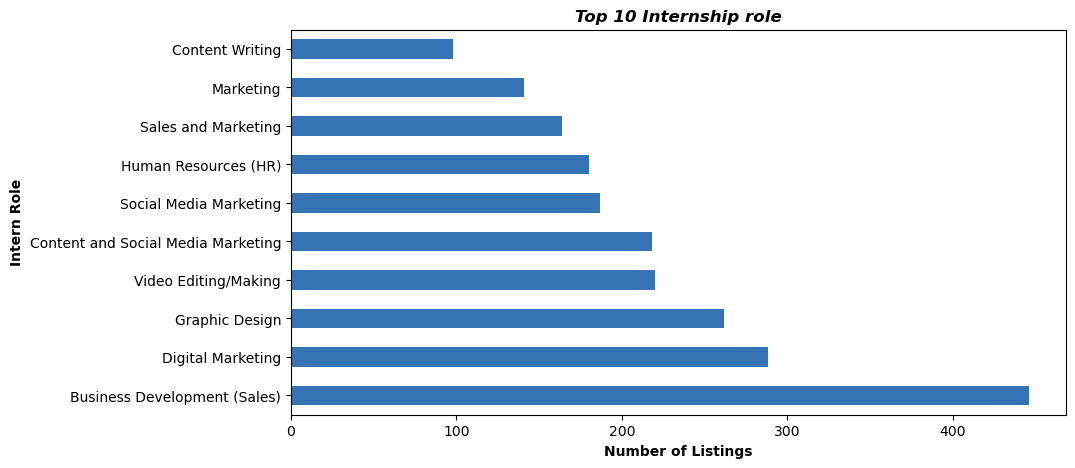

In [201]:
plt.figure(figsize=(10,5))
df['intern_role'].value_counts().head(10).plot(kind = 'barh',color = '#3674B5')
plt.title('Top 10 Internship role',fontweight = 'bold',fontstyle = 'italic')
plt.xlabel('Number of Listings',fontweight = 'bold')
plt.ylabel('Intern Role',fontweight = 'bold')
plt.show()

Business Development and Digital Marketing roles are the most in-demand internships, highlighting strong industry focus on sales and digital skills.

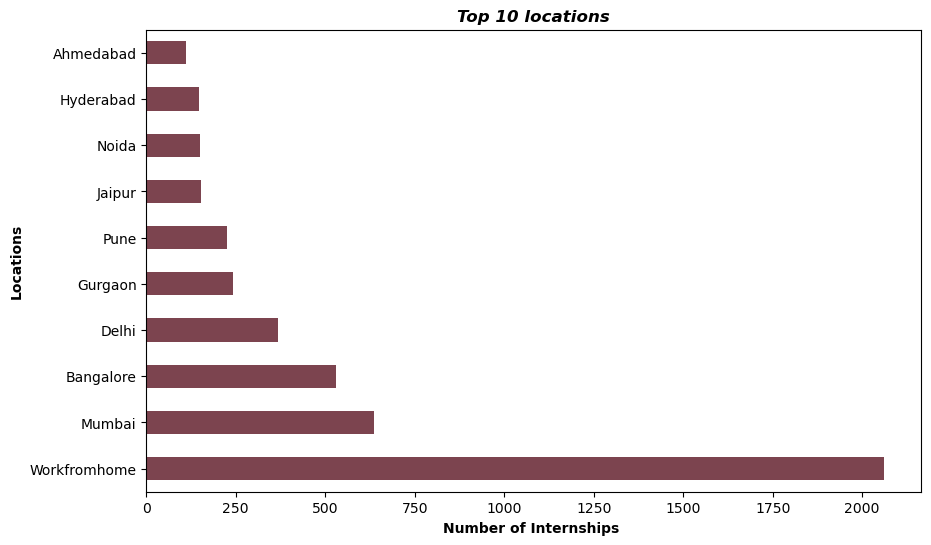

In [204]:
plt.figure(figsize=(10,6))
df['location'].value_counts().head(10).plot(kind = 'barh' , color = '#7C444F')
plt.title('Top 10 locations',fontweight = 'bold',fontstyle = 'italic')
plt.xlabel('Number of Internships ',fontweight = 'bold')
plt.ylabel('Locations',fontweight = 'bold')
plt.show()

Work-from-home internships dominate the listings, followed by major cities like Mumbai, Bangalore, and Delhi, reflecting a strong shift toward remote opportunities.

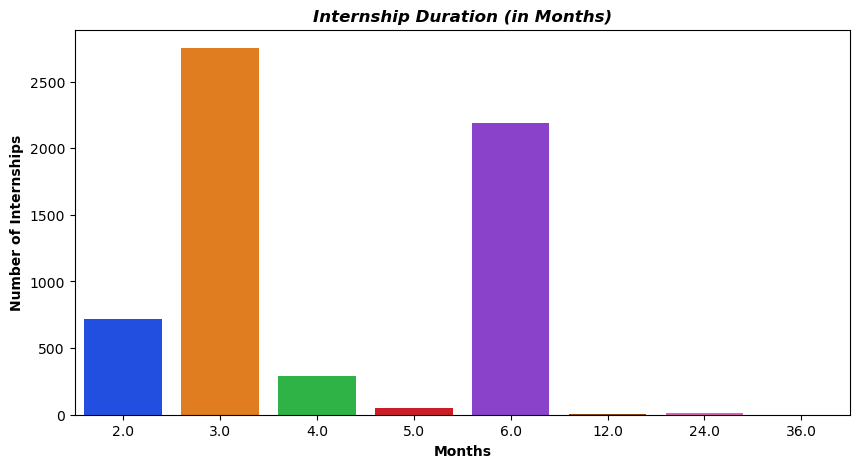

In [207]:
plt.figure(figsize=(10,5))
sns.countplot(x='duration(months)', data=df, hue='duration(months)', palette='bright', legend=False)
plt.title("Internship Duration (in Months)",fontweight = 'bold',fontstyle = 'italic')
plt.xlabel("Months",fontweight = 'bold')
plt.ylabel("Number of Internships",fontweight = 'bold')
plt.show()


Most internships have a duration of 3 to 6 months, indicating that companies prefer medium-term internship commitments.

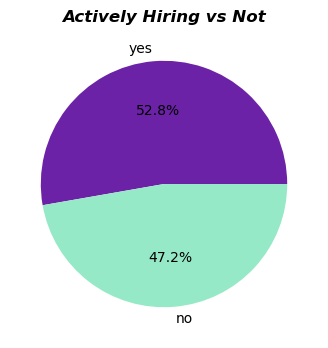

In [210]:
plt.figure(figsize=(6,4))
df['hiring_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#6C22A6','#96E9C6'])
plt.title("Actively Hiring vs Not",fontweight = 'bold',fontstyle = 'italic')
plt.ylabel('',fontweight = 'bold')
plt.show()


Over half (52.8%) of the internships are from actively hiring companies, indicating strong ongoing recruitment demand.

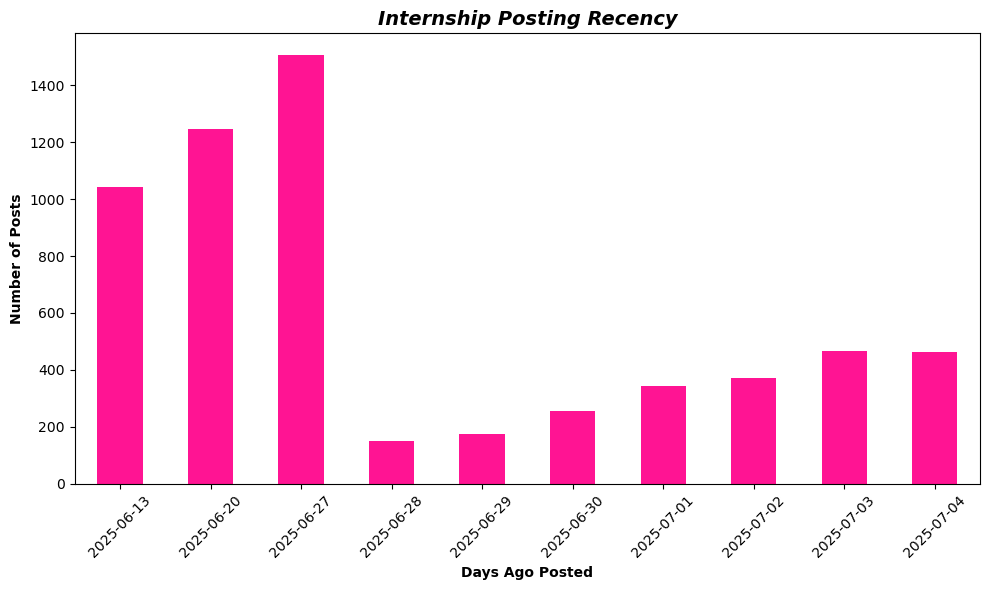

In [220]:
# Sort by date and count
date_counts = df['posted_date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
date_counts.plot(kind='bar', color='deeppink')
plt.title('Internship Posting Recency', fontsize=14, fontweight='bold',fontstyle = 'italic')
plt.xlabel('Days Ago Posted',fontweight = 'bold')
plt.ylabel('Number of Posts',fontweight = 'bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most internships were posted between June 13 and June 27, especially on June 27 which saw the highest number of posts.
After that, postings dropped and slowly increased again by July 3–4.

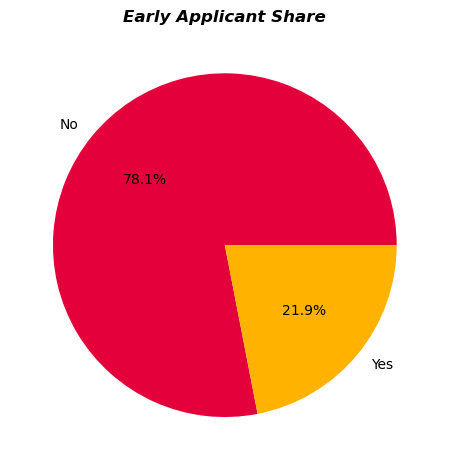

In [223]:
df['early_applicant'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#E4003A', '#FFB200'],
    labels=['No', 'Yes'],
    ylabel=''
   
)
plt.title('Early Applicant Share', fontweight='bold', fontstyle='italic')
plt.tight_layout()
plt.show()

Around 21.9% only  having the early applicant.

In [226]:
df['job_offer_label'] = df['job_offer(LPA)'].apply(lambda x: 'Yes' if x > 0 else 'No')


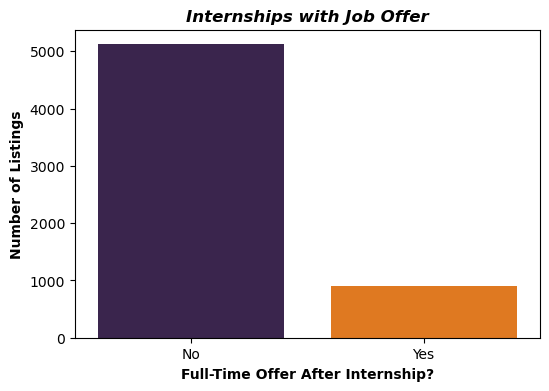

In [228]:

plt.figure(figsize=(6,4))
sns.countplot(x='job_offer_label', hue = 'job_offer_label',data=df, palette=['#3B1E54', '#FF7601'])
plt.title("Internships with Job Offer",fontweight='bold', fontstyle='italic')
plt.xlabel("Full-Time Offer After Internship?",fontweight = 'bold')
plt.ylabel("Number of Listings",fontweight = 'bold')
plt.show()

From 6024 listings, there are only have less than 1000 full-time job offers

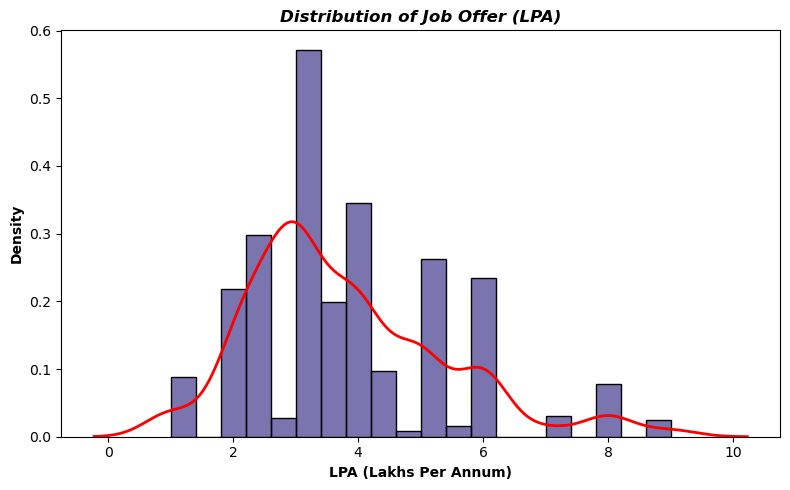

In [103]:
# plt.figure(figsize=(8,5))
# sns.histplot(df[df['job_offer(LPA)'] > 0]['job_offer(LPA)'], bins=20, kde=True, color='teal')
# plt.title("Distribution of Job Offer (LPA)",fontweight='bold', fontstyle='italic')
# plt.xlabel("LPA (Lakhs Per Annum)",fontweight = 'bold')
# plt.ylabel("Number of Internships",fontweight = 'bold')
# plt.show()

# plt.figure(figsize=(8, 5))
# sns.histplot(
#     df[df['job_offer(LPA)'] > 0]['job_offer(LPA)'],
#     bins=20,
#     kde=True,
#     color='teal',
#     line_kws={'color': 'red', 'linewidth': 2}  # KDE curve style
# )
# plt.title("Distribution of Job Offer (LPA)", fontweight='bold', fontstyle='italic')
# plt.xlabel("LPA (Lakhs Per Annum)", fontweight='bold')
# plt.ylabel("Number of Internships", fontweight='bold')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 5))

# Histogram
sns.histplot(
    df[df['job_offer(LPA)'] > 0]['job_offer(LPA)'],
    bins=20,
    color='#22177A',
    stat='density',  # Important to match scales
    alpha=0.6
)

# KDE Line (separate with color control)
sns.kdeplot(
    df[df['job_offer(LPA)'] > 0]['job_offer(LPA)'],
    color='red',      # Custom line color
    linewidth=2
)

# Titles and labels
plt.title("Distribution of Job Offer (LPA)", fontweight='bold', fontstyle='italic')
plt.xlabel("LPA (Lakhs Per Annum)", fontweight='bold')
plt.ylabel("Density", fontweight='bold')
plt.tight_layout()
plt.show()


The maximum number of internship roles offers 3 LPA

#  Bi-variate Analysis/Multivariate

# Continues vs Continues

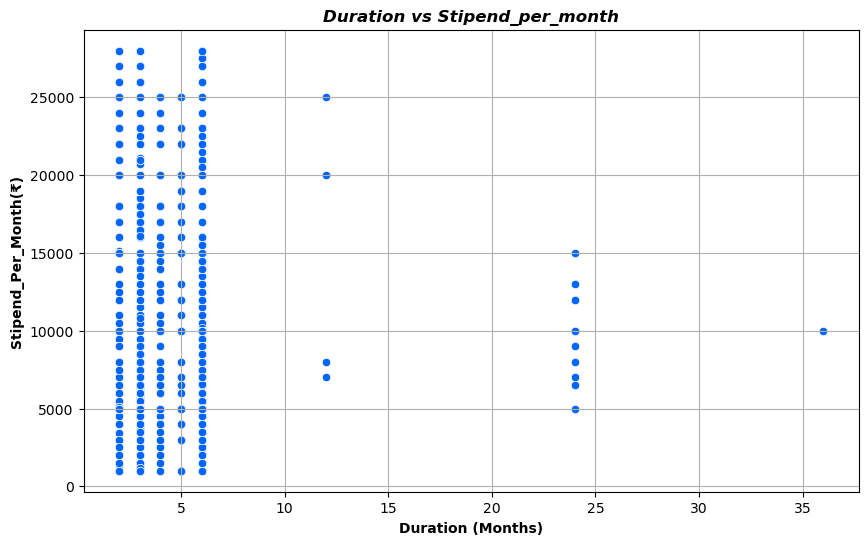

In [235]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='duration(months)', y='stipend_per_month', data=df,color = '#0065F8')
plt.title("Duration vs Stipend_per_month",fontweight='bold', fontstyle='italic')
plt.xlabel("Duration (Months)",fontweight = 'bold')
plt.ylabel("Stipend_Per_Month(₹)",fontweight ='bold')
plt.grid(True)
plt.show()


Most internships last 3–6 months and offer variable stipends, showing no strong link between longer duration and higher pay.

                   stipend_per_month  job_offer(LPA)
stipend_per_month           1.000000        0.222977
job_offer(LPA)              0.222977        1.000000


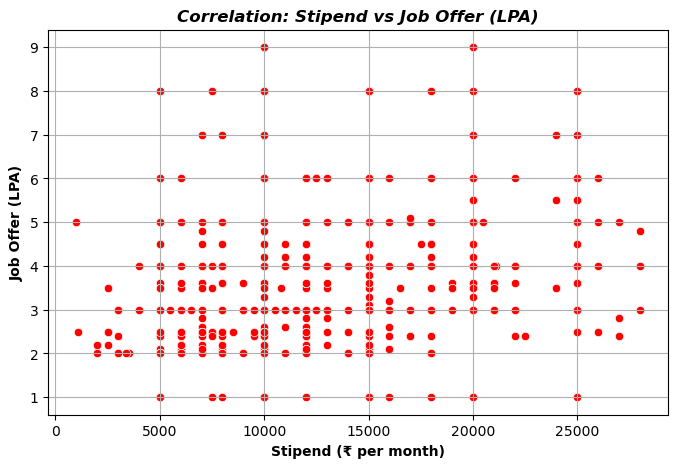

In [237]:
# Only take rows where both stipend and job_offer are available
job_offers = df[df['job_offer(LPA)']>0]
correlation = job_offers[['stipend_per_month','job_offer(LPA)']].corr()
print(correlation)

# Visualize with scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='stipend_per_month', y='job_offer(LPA)', data=job_offers,color ='red')
plt.title("Correlation: Stipend vs Job Offer (LPA)",fontweight='bold', fontstyle='italic')
plt.xlabel("Stipend (₹ per month)",fontweight = 'bold')
plt.ylabel("Job Offer (LPA)",fontweight = 'bold')
plt.grid(True)
plt.show()


- The correlation between stipend_max and job_offer (LPA) is approximately 0.20, which indicates a weak positive relationship. This suggests that higher stipends may slightly align with better job offers, but stipend alone is not a strong predictor of post-internship outcomes.

→ Too many 0 values in job_offer(LPA)
That’s the main reason you’re not getting a strong relationship.



## Continues vs Categorical

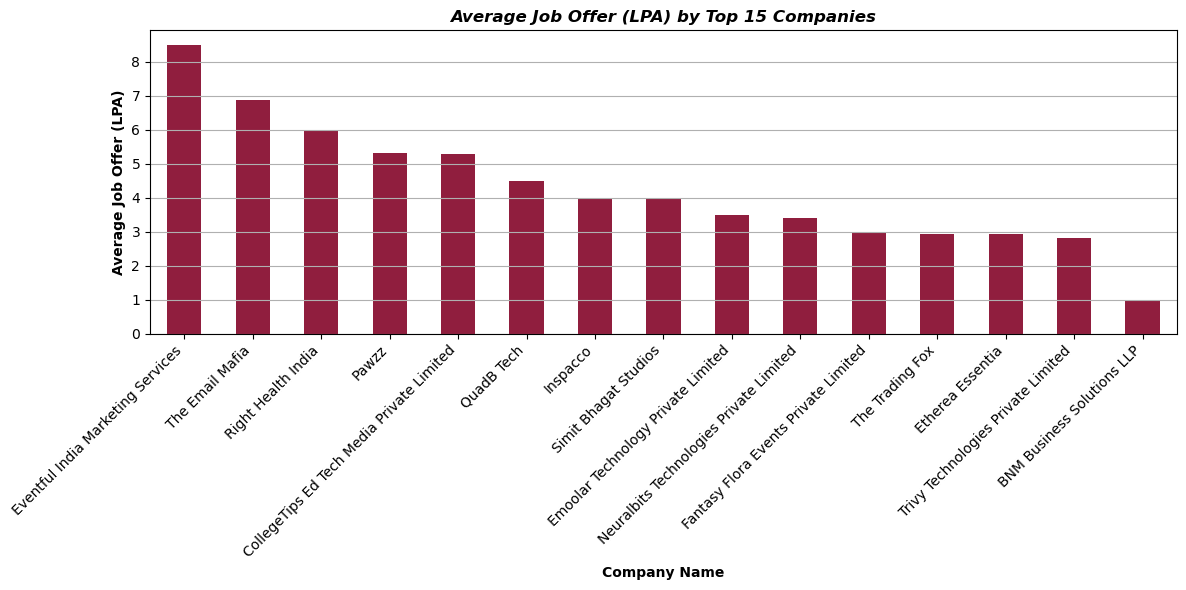

In [112]:
df_offer_comp = df[df['job_offer(LPA)'] > 0]
top_companies = df_offer_comp['company_name'].value_counts().head(15).index
df_top_companies = df_offer_comp[df_offer_comp['company_name'].isin(top_companies)]

avg_offer_by_company = df_top_companies.groupby('company_name')['job_offer(LPA)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_offer_by_company.plot(kind='bar', color='#901E3E')
plt.title("Average Job Offer (LPA) by Top 15 Companies",fontweight='bold', fontstyle='italic')
plt.xlabel("Company Name",fontweight = 'bold')
plt.ylabel("Average Job Offer (LPA)",fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



Among the top 15 companies offering internships, a few companies offer significantly higher full-time job offers (LPA) after internship. This indicates that students should also consider employer reputation and conversion rate while applying.

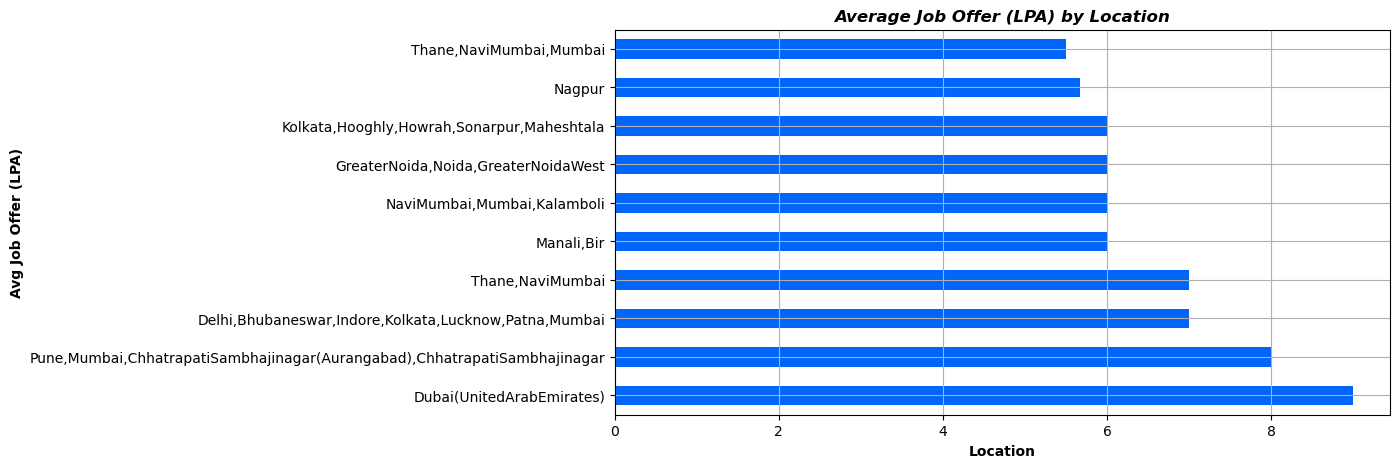

In [239]:
#job_offer(LPA) vs loctaion
# Filter only those with job offer

df_offer_loc = df[df['job_offer(LPA)'] > 0]

# Group by location and calculate average LPA
avg_offer_by_city = df_offer_loc.groupby('location')['job_offer(LPA)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
avg_offer_by_city.head(10).plot(kind='barh', color='#0065F8')
plt.title("Average Job Offer (LPA) by Location",fontweight='bold', fontstyle='italic')
plt.xlabel("Location",fontweight = 'bold')
plt.ylabel("Avg Job Offer (LPA)",fontweight = 'bold')
plt.grid(True)
plt.show()


The average job offer (LPA) after internships varies significantly across locations. Metropolitan areas like Pune, Mumbai, and Bangalore dominate with higher offers, suggesting a concentration of high-paying internship-to-job conversion opportunities. Tier-2 cities and hybrid remote locations tend to offer lower LPAs on average.

## Categorical vs Categorical

hiring_type        no   yes
early_applicant            
No               1787  2915
yes              1059   263


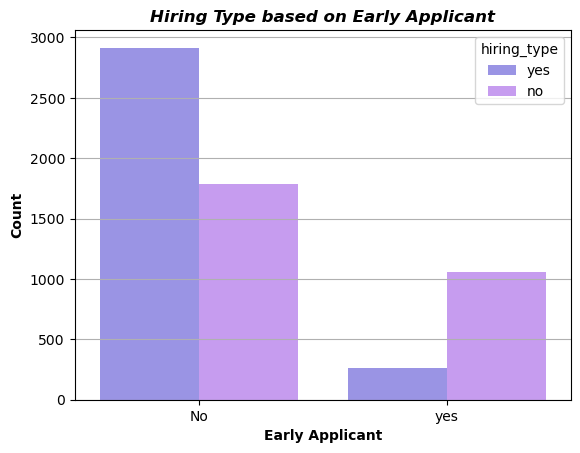

In [117]:
ct1 = pd.crosstab(df['early_applicant'], df['hiring_type'])
print(ct1)

sns.countplot(x='early_applicant', hue='hiring_type', data=df, palette=['#8F87F1','#C68EFD'])
plt.title("Hiring Type based on Early Applicant",fontweight='bold', fontstyle='italic')
plt.xlabel("Early Applicant",fontweight = 'bold')
plt.ylabel("Count",fontweight = 'bold')
plt.grid(True, axis='y')
plt.show()



- Most internships were applied without early applicant status.
- In both early and non-early cases, many companies were not actively hiring.
- So, being early doesn't guarantee hiring — but it might still help visibility.

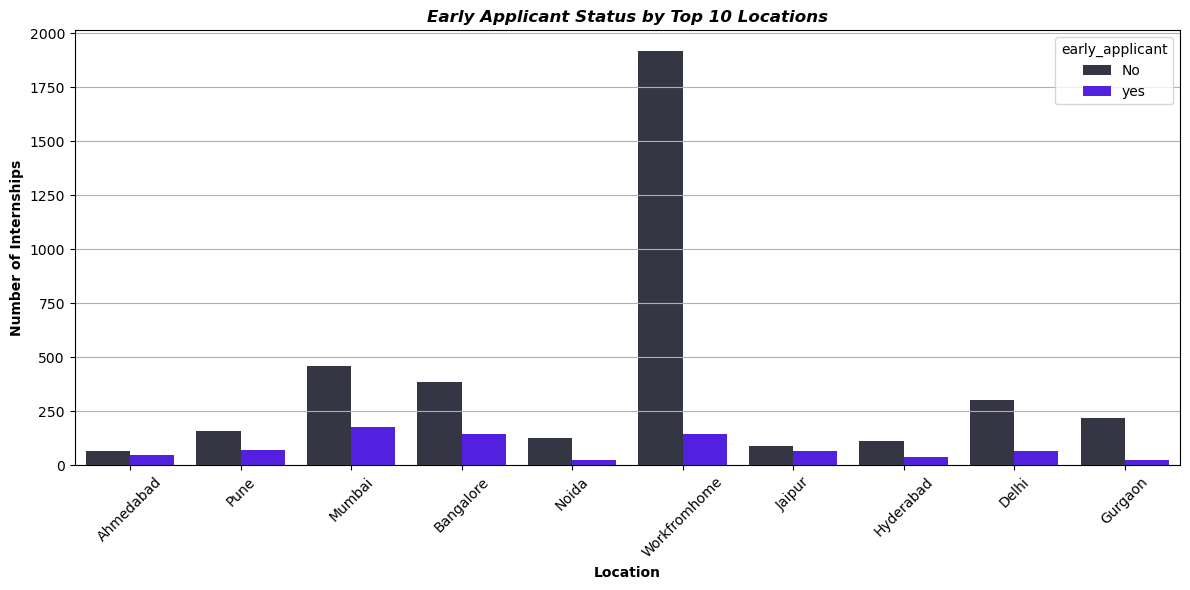

In [119]:
# Filter top 10 locations
top_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locations)]

# Plot using Seaborn grouped bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='location', hue='early_applicant', palette=['#333446','#4300FF'])
plt.title("Early Applicant Status by Top 10 Locations",fontweight='bold', fontstyle='italic')
plt.xlabel("Location",fontweight = 'bold')
plt.ylabel("Number of Internships",fontweight = 'bold')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Most students are not applying early for internships, even in top cities. Bangalore and Mumbai show slightly better early interest than others.

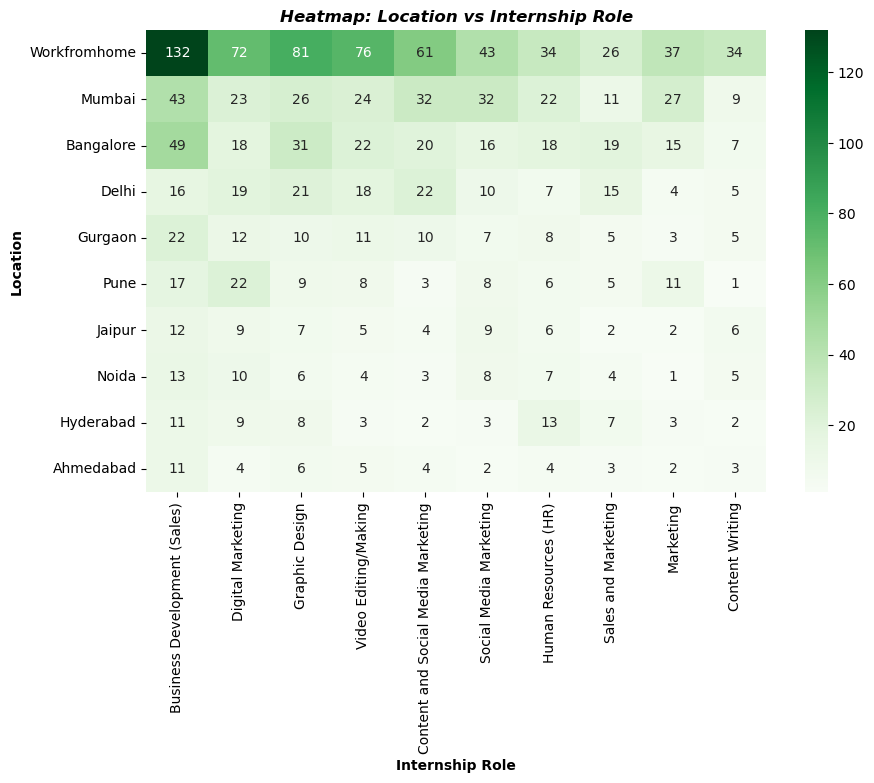

In [121]:
# Reuse crosstab data
matrix = pd.crosstab(df['location'], df['intern_role'])
# Limit to top 10x10 for readability
matrix = matrix.loc[matrix.sum(axis=1).nlargest(10).index, matrix.sum().nlargest(10).index]

plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Heatmap: Location vs Internship Role",fontweight='bold', fontstyle='italic')
plt.xlabel("Internship Role",fontweight = 'bold')
plt.ylabel("Location",fontweight = 'bold')
plt.show()


Work-from-home internships dominate all roles, offering the widest variety. Big cities like Mumbai, Bangalore, and Delhi follow next with decent opportunities across multiple roles, while smaller cities have fewer and more specific roles.

In [123]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [3]:
correlation = df[['stipend_per_month', 'job_offer(LPA)', 'duration(months)']].corr()
print(correlation)


                   stipend_per_month  job_offer(LPA)  duration(months)
stipend_per_month           1.000000        0.203856          0.124437
job_offer(LPA)              0.203856        1.000000          0.003141
duration(months)            0.124437        0.003141          1.000000


In [11]:
3%3

0

In [27]:

def fizzBuzz(n):
    # Write your code here
    for i in range(1,n+1):
        if i%3==0:
            print('Fizz')
            if i%5==0:
                print('Buzz')
        elif i%5==0:
            print('Buzz')
        else:
            print(i)

In [29]:
fizzBuzz(17)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
Fizz
Buzz
16
17
